# EDA on car sales dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set_style()

#importing necessary libraries

In [23]:
# uploading data from the system

data = pd.read_csv(r'C:\Users\nithi\Downloads\archive (4)\car_prices.csv')

In [24]:
# display the first few rows of the DataFrame

data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Understanding data 

In [26]:
# displaying numbers and rows in data

data.shape

(558837, 16)

In [27]:
# displaying the names of the column

data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [28]:
# to view column, no null

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [29]:
#statistics of the numerical columns
# t used to swap the rows and columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [30]:
# non numerical columns 

data.describe(exclude='number').T

,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693


## Handling the missing value

In [32]:
#to calculate the percentage of missing values 

data.isnull().sum()/data.count()*100

year             0.000000
make             1.877908
model            1.896112
trim             1.942954
body             2.418252
transmission    13.242956
vin              0.000716
state            0.000000
condition        2.160810
odometer         0.016823
color            0.134208
interior         0.134208
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

## Data cleaning

In [34]:
# We are filling missing values with 'Automatic' because it is the most used transmission type.

data['transmission'].fillna('automatic', inplace=True)

In [35]:
data.dropna(axis=0, inplace=True)

In [36]:
data.isnull().sum()/data.count()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [37]:
# Since year is a time based data, the best approach is to convert it into datetime data type.

data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year

In [38]:
data['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

### Changing the column conditon 1 to 5

In [40]:
data['condition'].replace(range(10, 21), 1, inplace=True)
data['condition'].replace(range(20, 31), 2, inplace=True)
data['condition'].replace(range(30, 41), 3, inplace=True)
data['condition'].replace(range(40, 51), 4, inplace=True)

In [41]:
data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [42]:
data['interior'].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

#### There is a '_' in the color so we are using multicolour as thier name

In [44]:
data['color'].replace('—', 'multicolor', inplace=True)
data['interior'].replace('—', 'multicolor', inplace=True)

### The 'Saledate' column is currently of the object data type.

### We need to convert it to a datetime data type and retain only the date part, discarding the time component.

In [47]:
data['saledate'] = pd.to_datetime(data['saledate'], utc=True, format='mixed').dt.date

In [51]:
# converting the data into lowercase

data['body'] = data['body'].str.lower()

In [52]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,4.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14
3,2015,Volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,4.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,4.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


## Data Visualization

In [54]:
def countplot(col, label, rotation=0, size=(12,6)):
    '''
    Create Count Plot using seaborn library.
    It takes four arguments.

    col (str): The column used to create countplot
    label (str): Name of x-label and it is also used as title.
    rotation (int): How much you want to rotate the x-ticks.
    size (tuple): It is a tuple and takes the size for figure in (width, height) format.
    '''
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=data[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

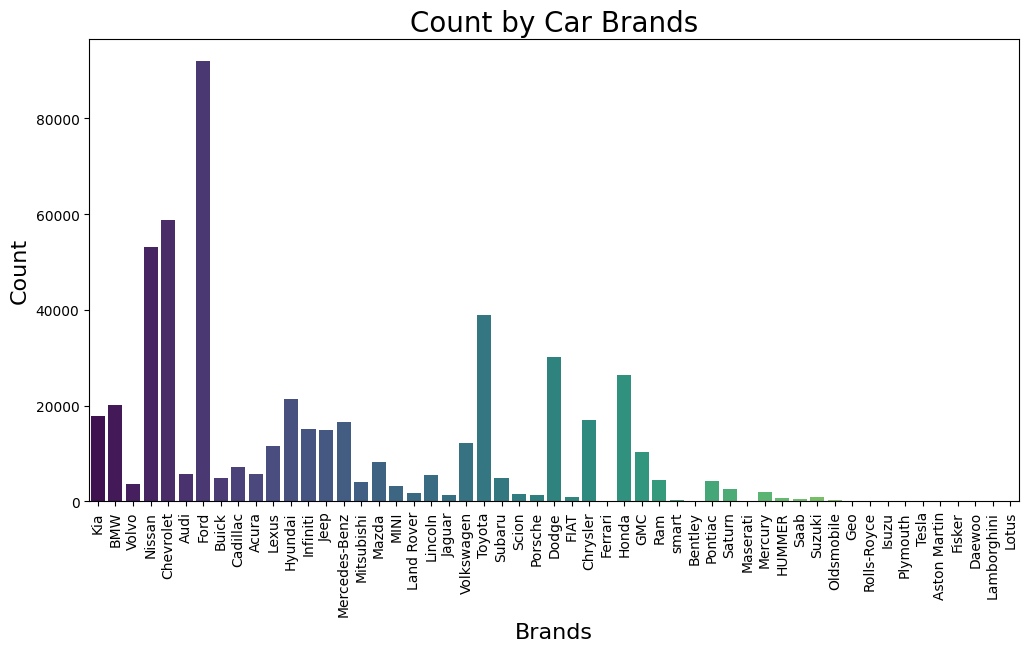

In [55]:
countplot('make', 'Brands', 90)

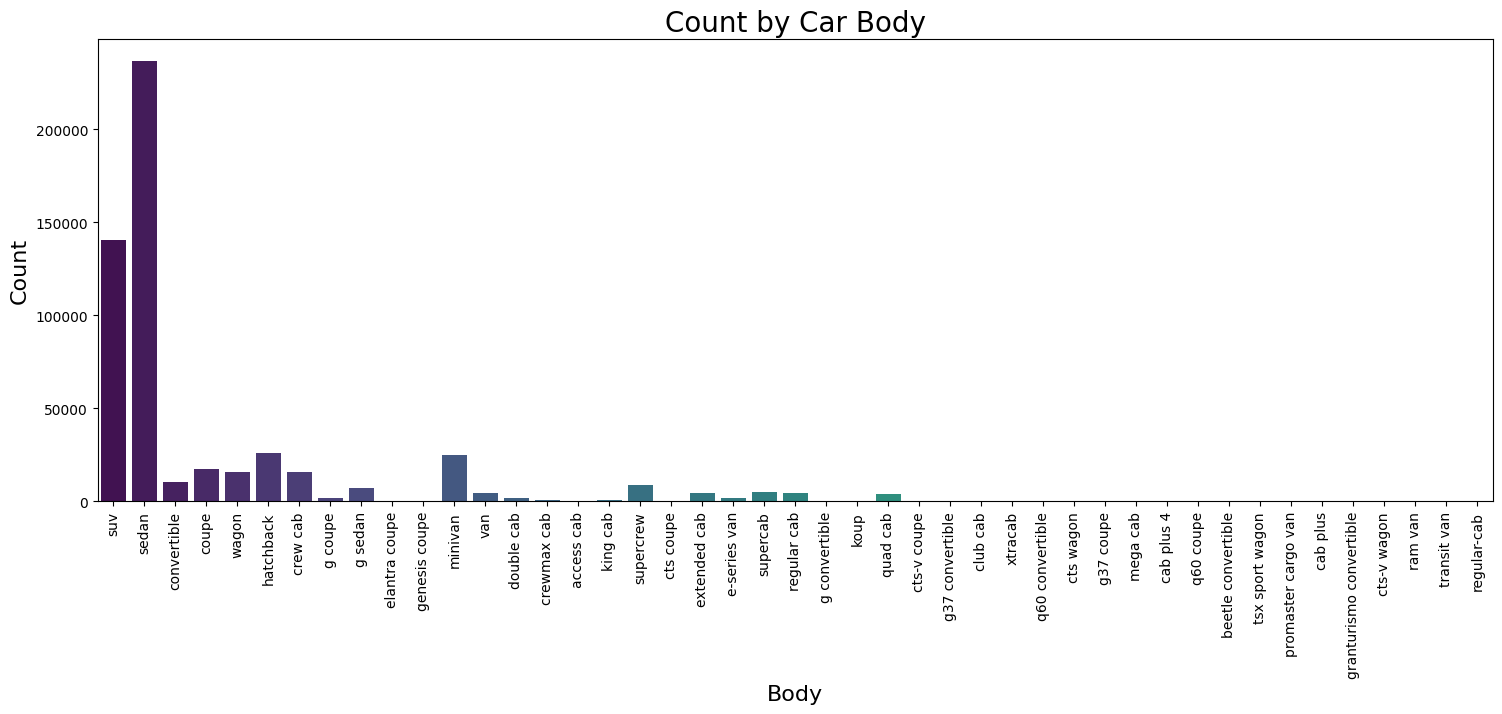

In [56]:
countplot('body', 'Body', 90, (18,6))

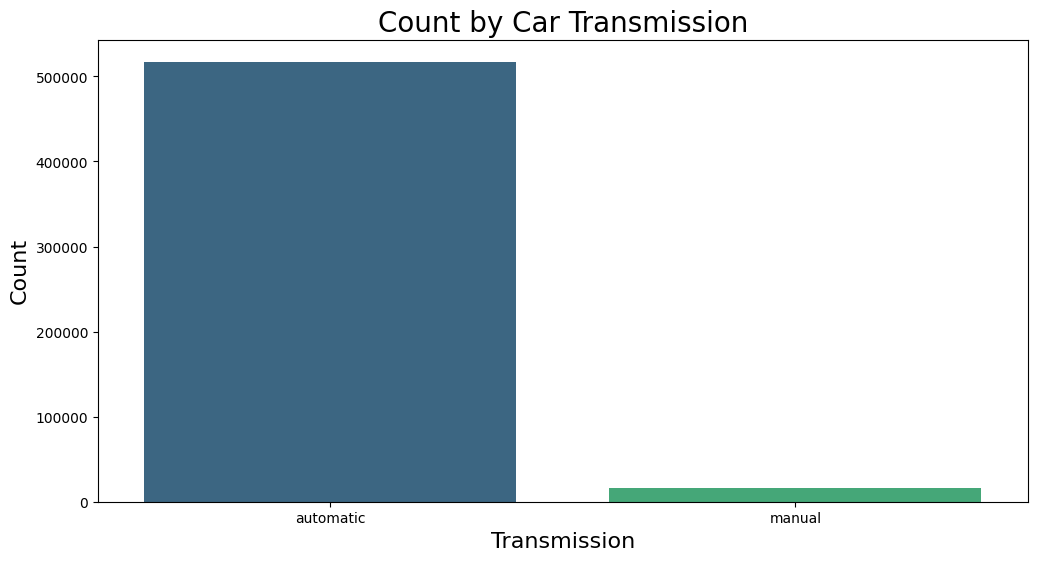

In [58]:
countplot('transmission', 'Transmission')


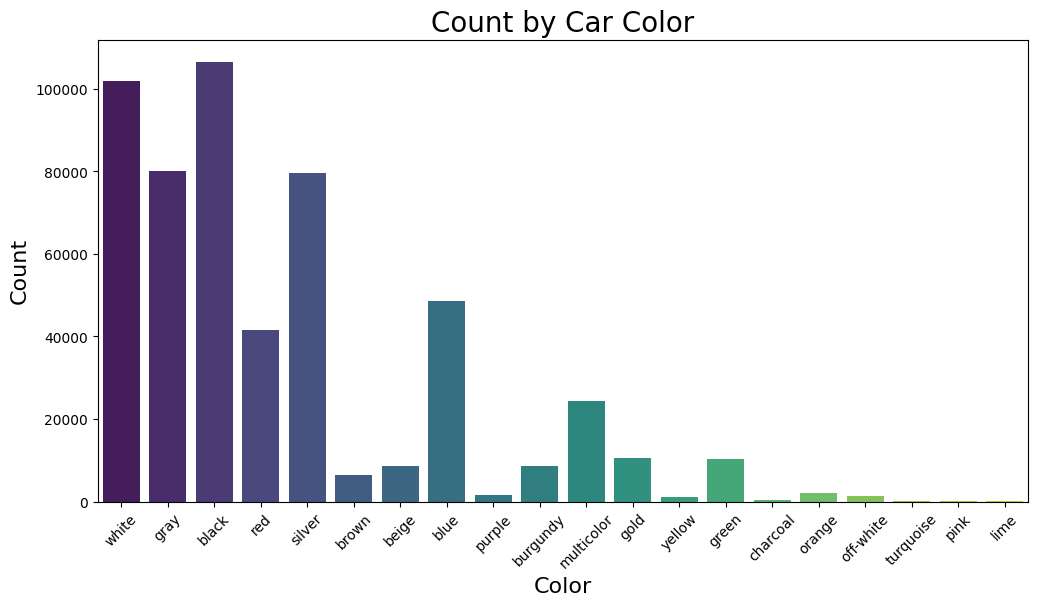

In [59]:
countplot('color', 'Color', 45)

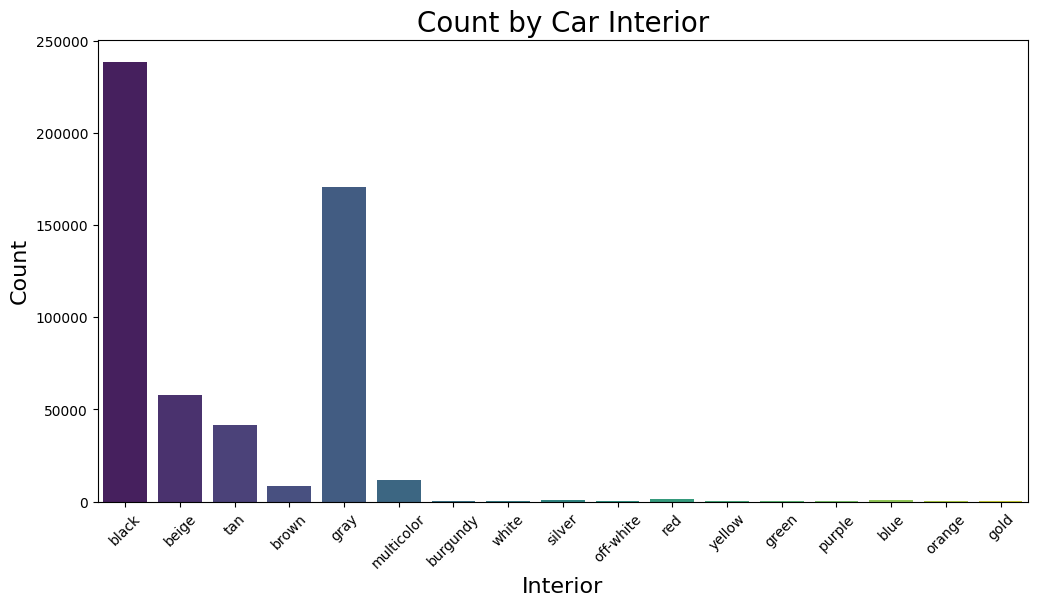

In [61]:
countplot('interior', 'Interior', 45)

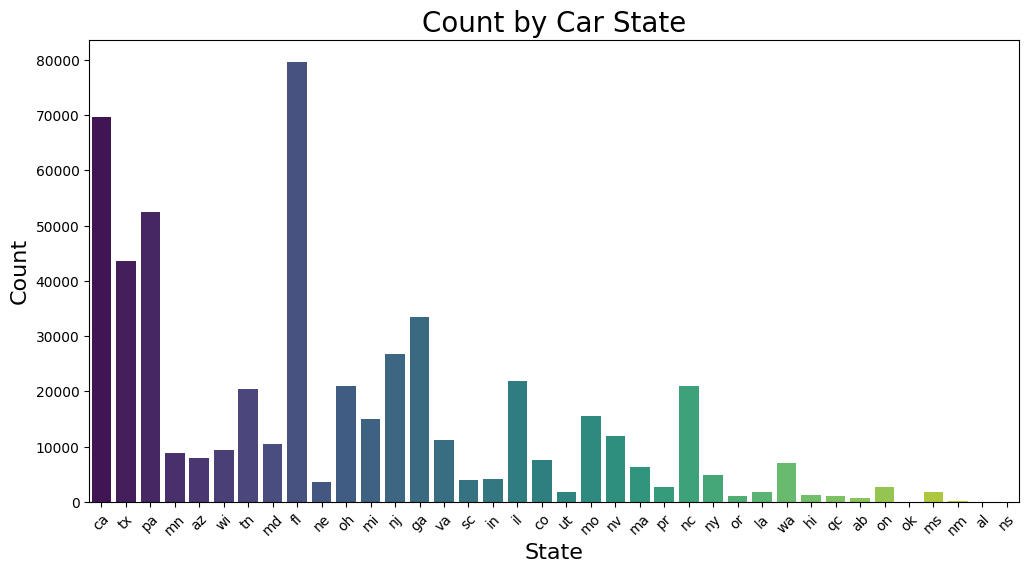

In [62]:
countplot('state', 'State', 45)

In [63]:
def boxplot(col, label):
    '''
        Generate a boxplot for the provided data series.

        col (string): Column name from the dataframe.

        label (string): Label for the y-axis and the title for the chart.
    '''

    plt.figure(figsize=(10,6))
    sns.boxplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)


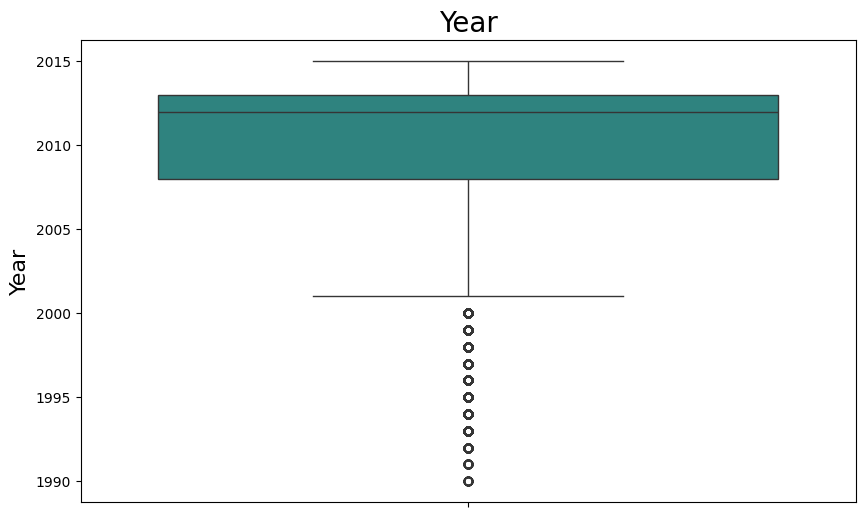

In [64]:
boxplot('year', 'Year')

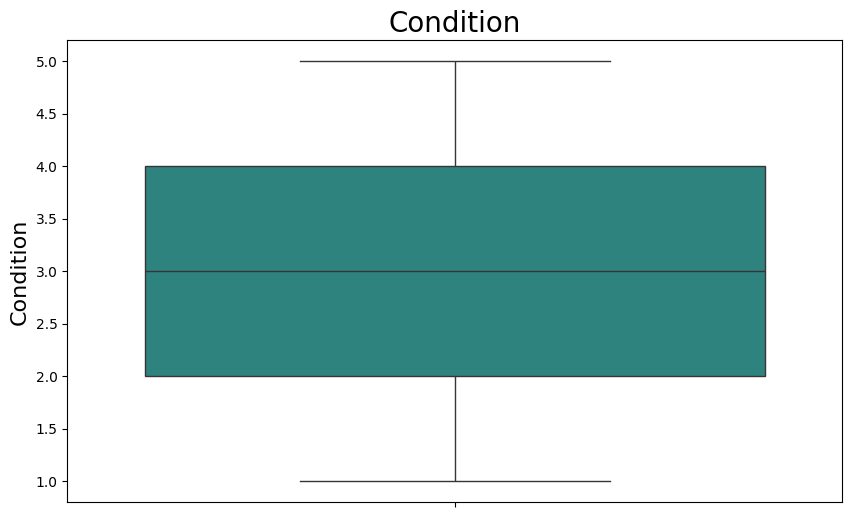

In [65]:
boxplot('condition', 'Condition')

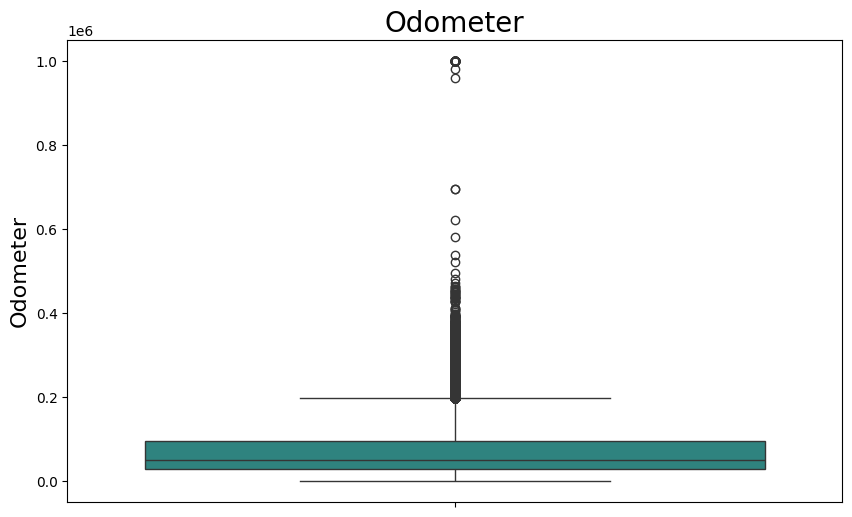

In [66]:
boxplot('odometer', 'Odometer')

In [67]:
def histplot(col, label):
    '''
        Generate a histogram for the provided data series.

        col (string): Column name from the dataframe.

        label (string): Label for the x-axis and the title for the chart.
    '''

    plt.figure(figsize=(10,6))
    sns.histplot(data[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)


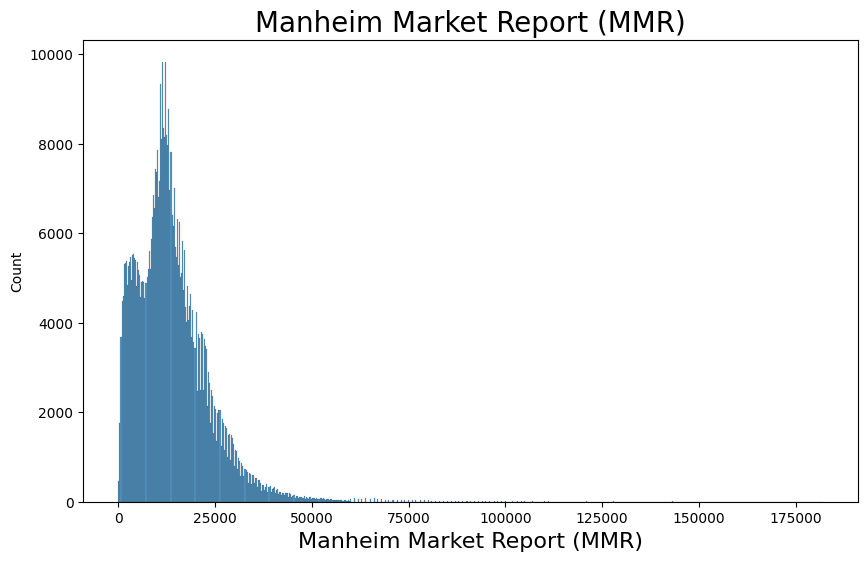

In [68]:
histplot('mmr', 'Manheim Market Report (MMR)')

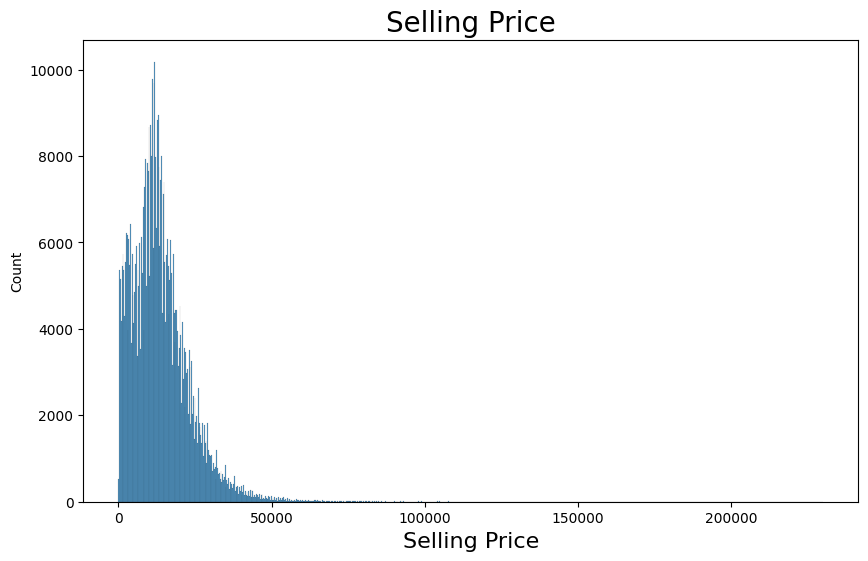

In [69]:
histplot('sellingprice', 'Selling Price')

### Examining these results, we can observe that all columns contain a number of outliers. 

### Specifically,the 'MMR' and 'Selling Price' columns are highly skewed to the right.

In [72]:
cat_col = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller']
num_col = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

<Axes: >

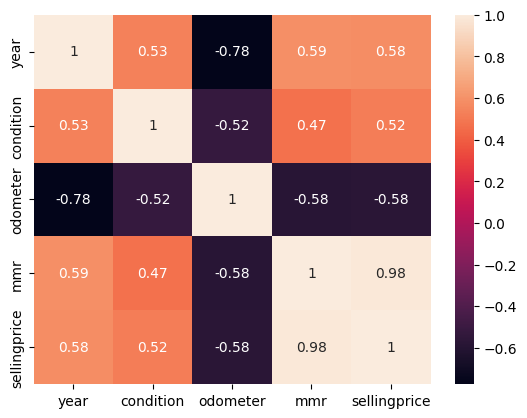

In [117]:
# Create the heatmap
sns.heatmap(data[num_col].corr(), annot=True)


In [119]:
# Group by 'make' and calculate the mean of 'sellingprice' and 'condition'
# Then sort the resulting DataFrame by 'sellingprice' and 'condition' in descending order

data.groupby('make')[['sellingprice', 'condition']].mean().sort_values(by=['sellingprice', 'condition'], ascending=False)


,sellingprice,condition
make,,
Rolls-Royce,153456.250000,3.750000
Ferrari,127210.526316,3.526316
Lamborghini,112625.000000,4.000000
Bentley,74349.130435,3.295652
Tesla,67054.347826,3.869565
Aston Martin,54812.000000,3.200000
Fisker,46461.111111,3.555556
Maserati,45632.442748,3.274809
Lotus,40800.000000,2.000000


Text(0, 0.5, 'Selling Price')

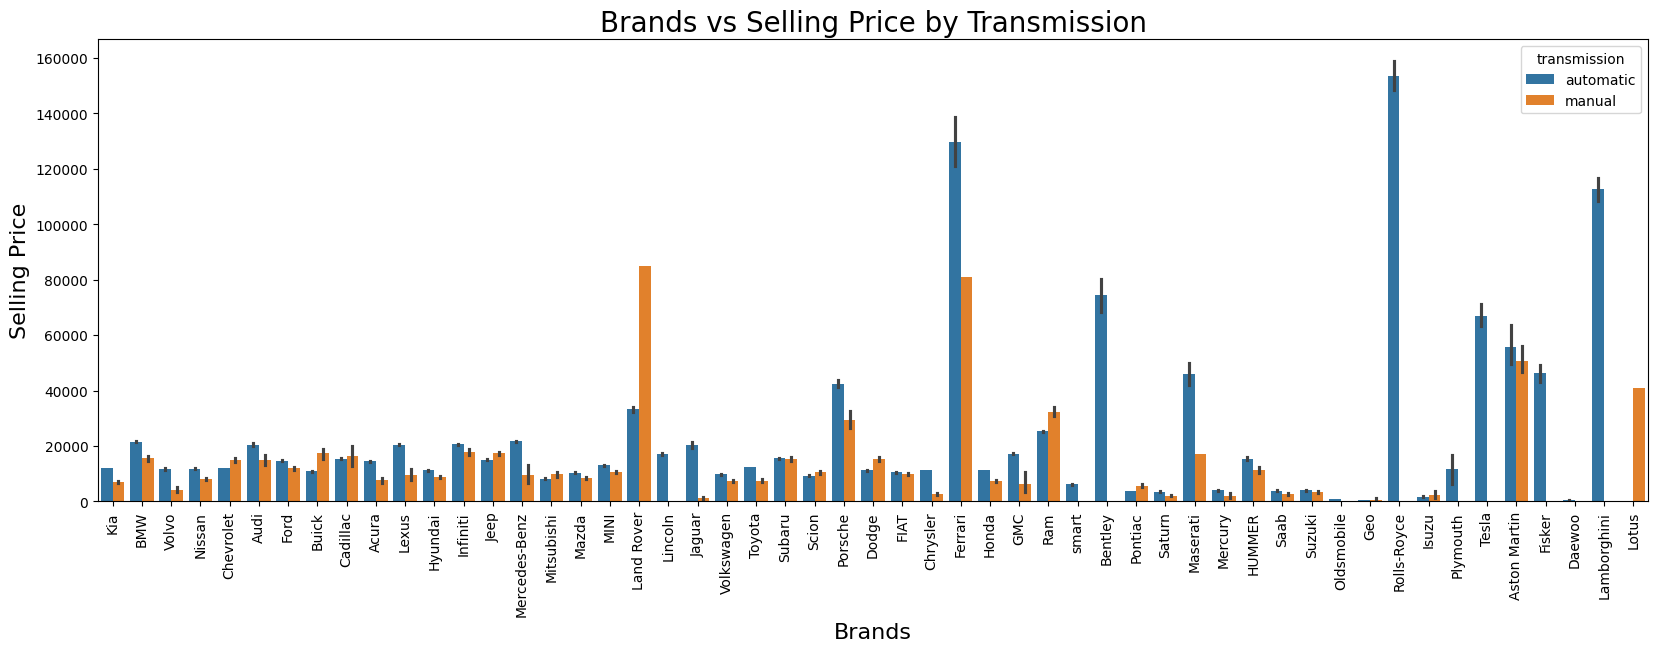

In [121]:

# Set the figure size
plt.figure(figsize=(20, 6))

# Set the title of the plot
plt.title('Brands vs Selling Price by Transmission', fontsize=20)

# Create a bar plot with 'make' on the x-axis, 'sellingprice' on the y-axis, and colored by 'transmission'
sns.barplot(x=data['make'], y=data['sellingprice'], hue=data['transmission'])

# Set the x-axis label
plt.xlabel('Brands', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Selling Price', fontsize=16)



### The fundamental aspects of the code are similar to those used in the bar plot mentioned earlier

Text(0, 0.5, 'MMR')

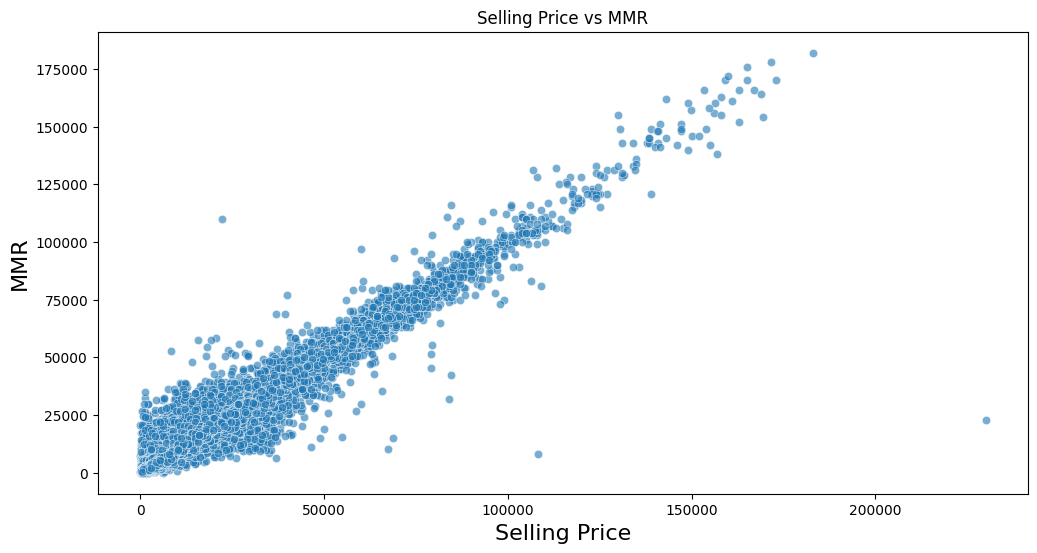

In [89]:
plt.figure(figsize=(12,6))
plt.title('Selling Price vs MMR')
sns.scatterplot(x=data['sellingprice'], y=data['mmr'], palette='magma', alpha=0.6)
plt.xlabel('Selling Price', fontsize=16)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'MMR')

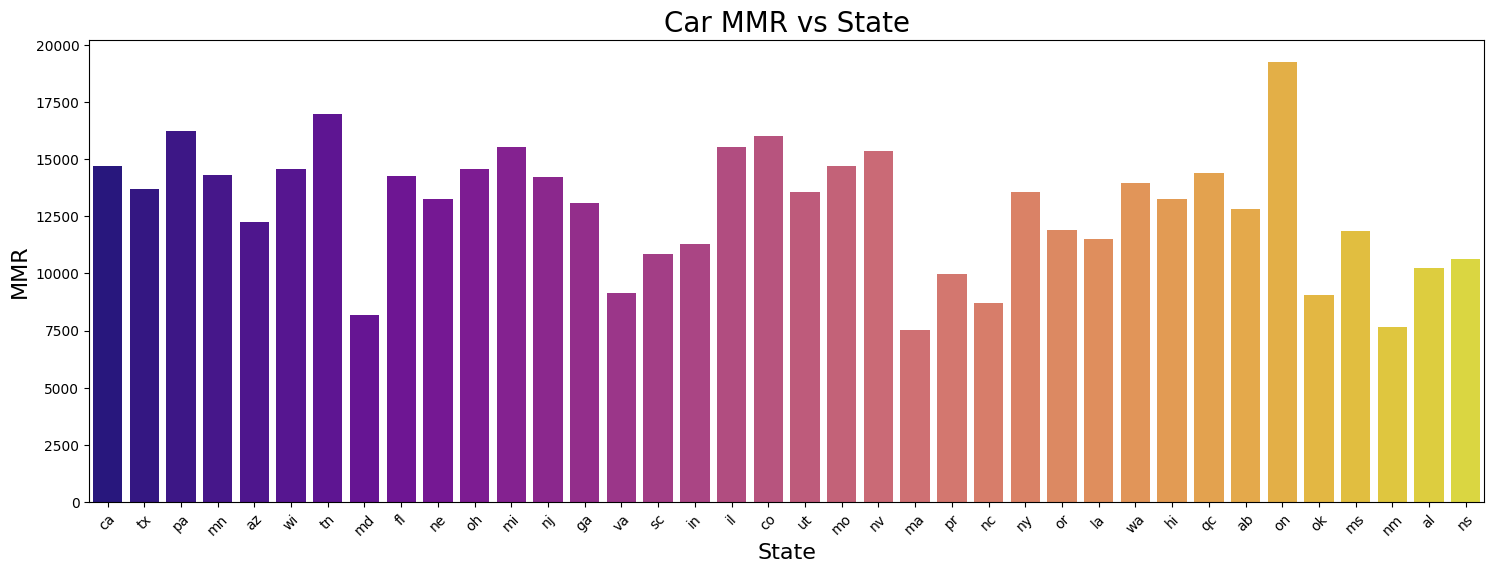

In [80]:
plt.figure(figsize=(18,6))
plt.title('Car MMR vs State', fontsize=20)
sns.barplot(x=data['state'], y=data['mmr'], errorbar=None, palette='plasma')
plt.xlabel('State', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('MMR', fontsize=16)

Text(0, 0.5, 'Selling Price')

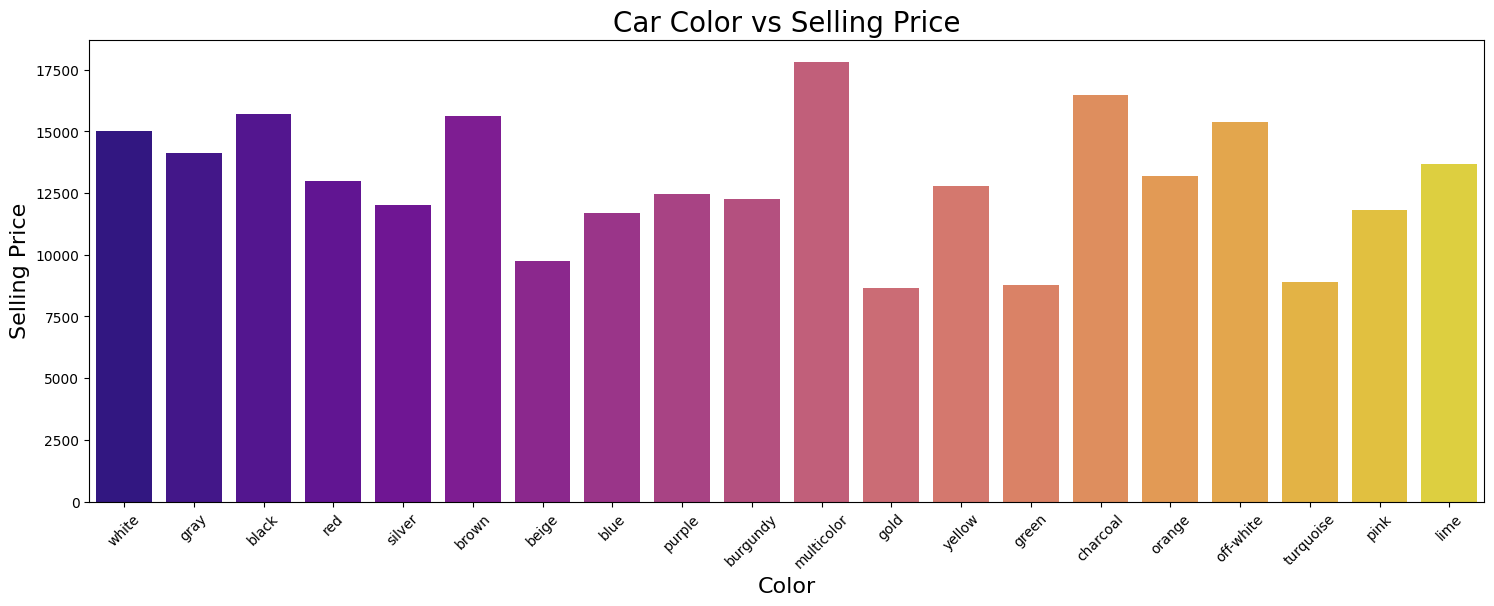

In [79]:
plt.figure(figsize=(18,6))
plt.title('Car Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='color', y='sellingprice', errorbar=None, palette='plasma')
plt.xlabel('Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

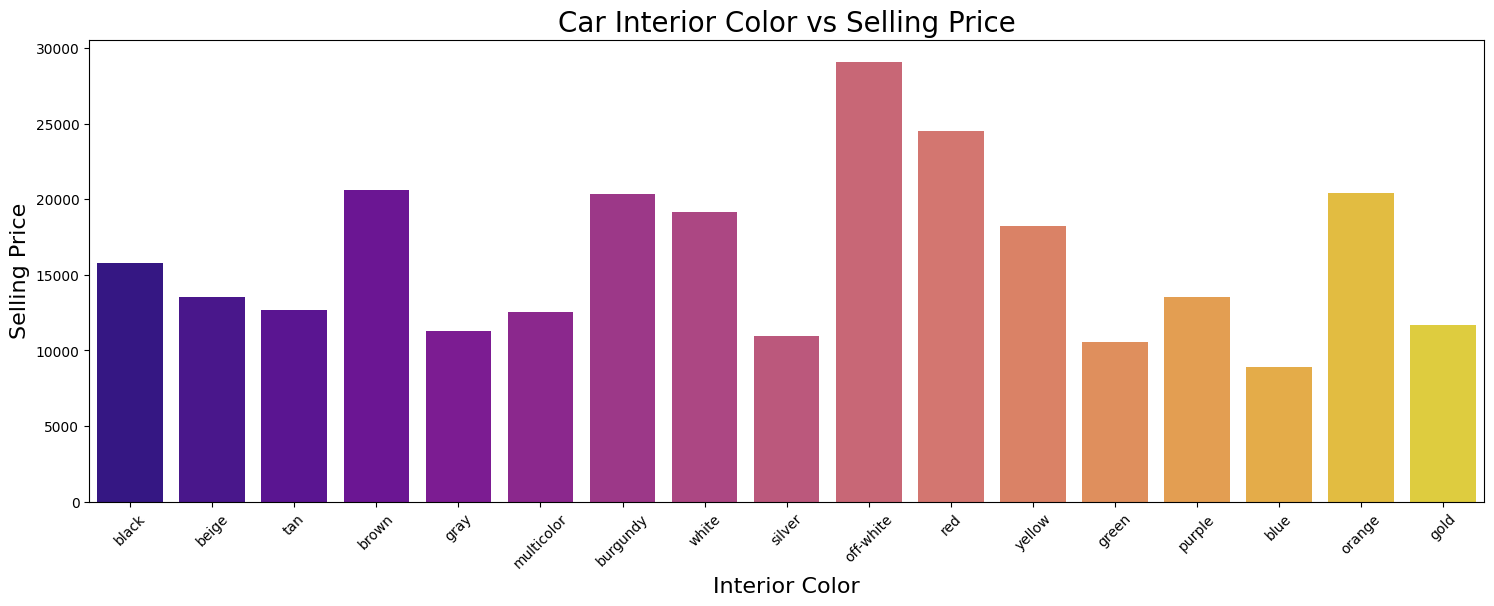

In [81]:
plt.figure(figsize=(18,6))
plt.title('Car Interior Color vs Selling Price', fontsize=20)
sns.barplot(data=data, x='interior', y='sellingprice', errorbar=None, palette='plasma')
plt.xlabel('Interior Color', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

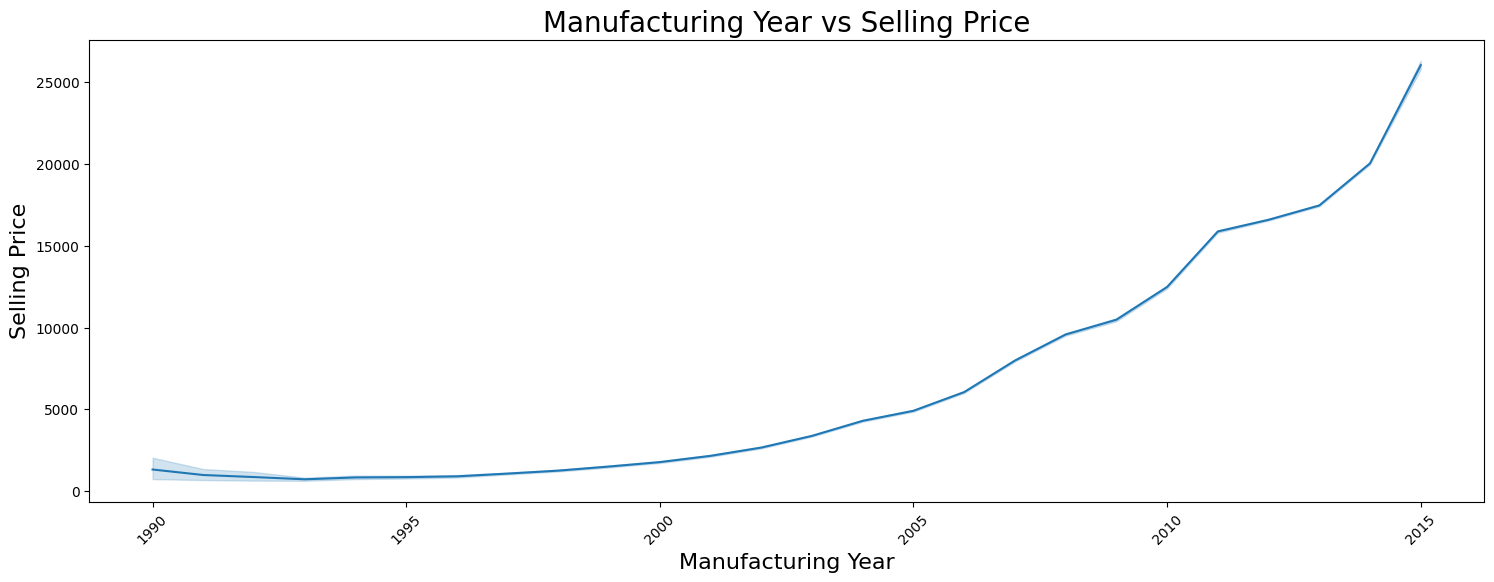

In [82]:
plt.figure(figsize=(18,6))
plt.title('Manufacturing Year vs Selling Price', fontsize=20)
sns.lineplot(x=data['year'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Manufacturing Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

Text(0, 0.5, 'Selling Price')

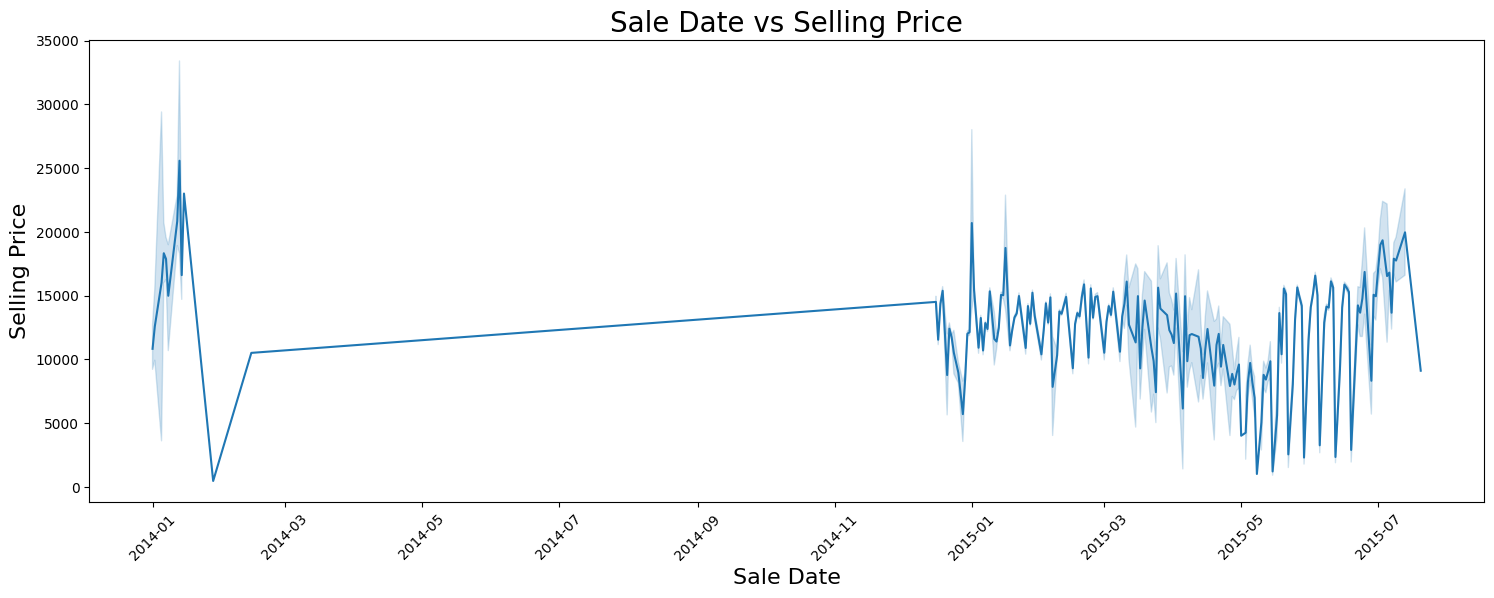

In [84]:
plt.figure(figsize=(18,6))
plt.title('Sale Date vs Selling Price', fontsize=20)
sns.lineplot(x=data['saledate'], y=data['sellingprice'], palette='viridis')
plt.xlabel('Sale Date', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Selling Price', fontsize=16)

# Summary Report

## Dataset Overview
- **Total Rows**: 558,837
- **Total Columns**: 16
- **Integer Type Columns**: 5
- **Object Type Columns (String)**: 11

## Statistical Analysis
- The MMR and Selling Price values are close.
- The maximum odometer reading is 999,999, which, while high, is not impossible.
- Some cars were manufactured in 1982, indicating the presence of vintage cars.

## Missing Values
- **Transmission**: Highest missing values at 13%.
- **Make, Model, Trim, Body, and Condition**: 1%-2% missing values.
- **Other Columns**: Less than 1% missing values.

## Data Type Conversion
- **Year and Sale Date**: Should be converted to `datetime` from integer and object types.

## Data Cleaning
- **Condition Column**: Values like 45, 59, and 34 are incorrect and should be between 1-5.
- **Color and Interior Columns**: Contain '-' values, replaced with 'Multicolor' to avoid adding unnecessary new categories.
- **Body Column**: Inconsistencies like 'Sedan', 'sedan', 'SUV', 'suv' need standardization.

## Top Brands and Body Types
- **Top 5 Brands by Count**: Ford, Chevrolet, Nissan, Toyota, and Dodge.
- **Top 2 Body Types**: Sedan and SUV.

## Transmission
- Automatic transmission is the most common, causing an imbalance in the dataset.

## Color
- Black and Grey are the most common interior colors.

## Geographical Distribution
- **Florida and California**: Highest number of cars (70k-80k and more).
- **Other States**: Fewer than 50k cars.

## Manufacturing Year
- Most cars are manufactured between 2000 and 2015, with some outliers dating back to 1990 or earlier.

## Condition Ratings
- Most cars have a condition rating between 2 and 4, with a few rated 1 or 5.

## Odometer Readings
- The maximum odometer reading is around 200,000, with many outliers showing readings of 999,999.

## Price Analysis
- **MMR and Selling Price**: Similar, with a high concentration of cars priced between $10,000-$20,000. Both distributions are right-skewed.
- **Sale Dates**: Range from 2015 to the last two months of 2014, with the first quarter of 2014 considered outliers.
- **Correlation Between Columns**: Ranges from -0.78 to 0.98, indicating some multicollinearity.

## Brand Analysis
- **Most Expensive Car**: Rolls Royce with an average price of $153,456.25.
- **Cheapest Car**: Dodge at $450.00.
- **Automatic Transmission Cars**: Generally have higher selling prices except for Land Rover and Lotus. Lotus does not have automatic transmission cars, while Rolls-Royce does not have manual transmission cars.

## Scatterplot and Regression Analysis
- **MMR and Selling Price**: Highly correlated, though some data points deviate significantly.
- **Car Color and Interior Color**: Do not significantly impact the selling price.
- **Distance Traveled and Selling Price**: Negative correlation, but not strongly decisive.
- **Manufacturing Year**: Cars manufactured after 2000 show an upward trend in selling price.
- **Sale Date and Selling Price**: No discernible trend, indicating a random walk pattern.


# Concluding with Questions That Could Be Raised


## Most sold car models

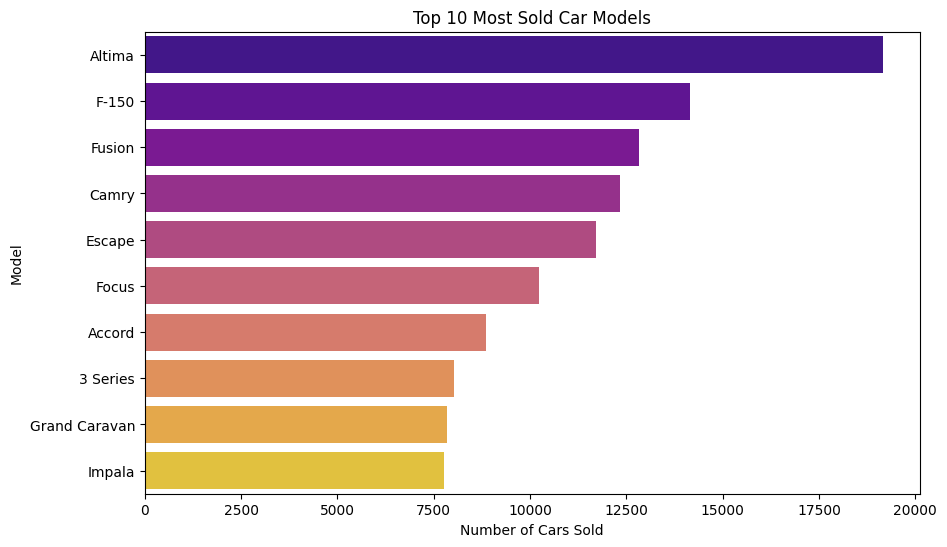

In [93]:
# Count the most sold car models
top_models = data['model'].value_counts().head(10)

# Visualize the most sold car models
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='plasma')
plt.title('Top 10 Most Sold Car Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Model')
plt.show()

## Highest number of sales

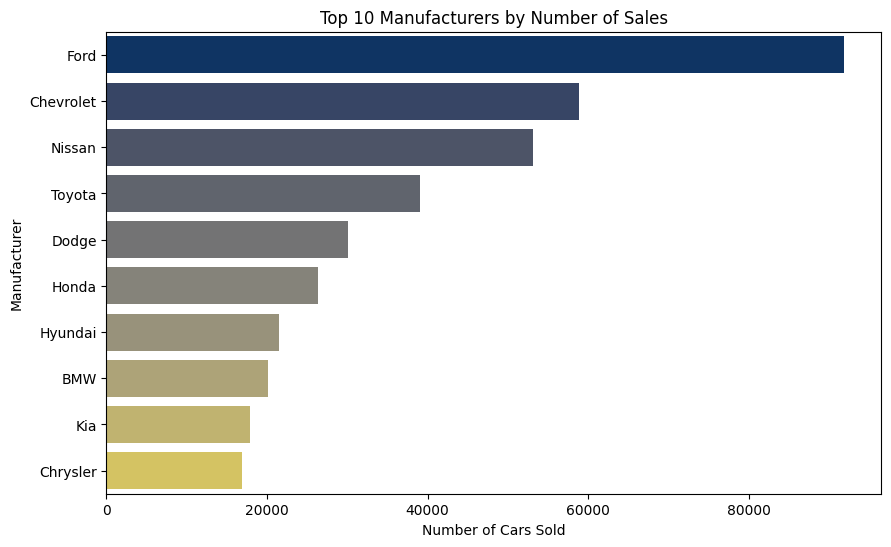

In [98]:
# Count the manufacturers with the highest number of sales

top_makes = data['make'].value_counts().head(10)

# Visualize the manufacturers with the highest number of sales

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='cividis')
plt.title('Top 10 Manufacturers by Number of Sales')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Manufacturer')
plt.show()

## Average selling cars by state

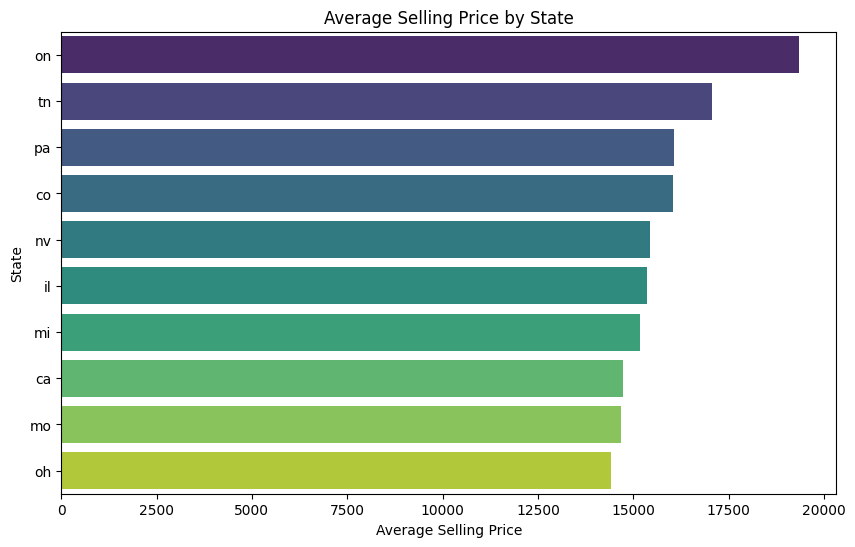

In [113]:
# Calculate the average selling price by state
average_price_per_state = data.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(10)

# Visualize the average selling price by state
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_per_state.values, y=average_price_per_state.index, palette='viridis')
plt.title('Average Selling Price by State')
plt.xlabel('Average Selling Price')
plt.ylabel('State')
plt.show()

# Project Conclusion

## Summary of Findings
- **Dataset Overview**: The dataset includes 558,837 rows and 16 columns, with a mix of integer and object types. Key columns such as `Transmission`, `Make`, `Model`, and `Condition` were analyzed for completeness and consistency.
- **Statistical Analysis**: MMR and Selling Price values are closely related. The presence of vintage cars and high odometer readings were noted. Price distributions are right-skewed, with a concentration between $10,000-$20,000.
- **Data Quality Issues**: Missing values in `Transmission` and inconsistencies in `Condition` and `Body` columns were identified and addressed. Data cleaning efforts included standardizing categorical variables and replacing incorrect values.

## Lessons Learned
- **What Went Well**: The statistical analysis provided clear insights into pricing trends and the impact of factors such as transmission type and manufacturing year on selling prices.
- **Areas for Improvement**: Handling missing data and correcting inconsistent entries could be improved with more robust data imputation and standardization techniques.
- **Skills Acquired**: Enhanced skills in data cleaning, statistical analysis, and visualization were developed through this project.

## Next Steps
- **Future Work**: Investigate additional features such as geographic factors and car specifications to refine price prediction models. Further analysis could explore the impact of various car attributes on market value.
- **Recommendations**: Implement more advanced data imputation techniques to handle missing values in critical columns. Standardize data entry processes to prevent inconsistencies in categorical variables.
- **Long-Term Goals**: Develop a comprehensive predictive model for car pricing that incorporates additional features and external data sources to improve accuracy and market insights.

## Acknowledgments
- **Resources**: Appreciate the tools and resources used for data analysis, including Python libraries (e.g., Pandas, Seaborn) and visualization tools.

## Final Thoughts
- **Reflection**: This project provided valuable insights into the car market, highlighting key factors influencing car prices and identifying areas for further investigation.
- **Impact**: The analysis has implications for both buyers and sellers, offering a better understanding of price trends and factors affecting car valuation in the market.
